In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris() #아이리스 데이터 로드
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df.head())
iris_df['species'] = iris.target #품종이 타겟(0:Setosa, 1:Versicolor, 2:Virginica)
print(iris_df.head())
#print(iris.DESCR) #print(iris_df.head()) #print(iris_df.info())#print(iris_df.describe())
input_data = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)',
                                                             'petal width (cm)']].to_numpy()
target_data = iris_df['species'].to_numpy()
print(input_data[:5])
print(target_data[:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4   

In [2]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(input_data)
input_scaled = ss.transform(input_data)
print(input_scaled[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input_data, target_data, stratify=target_data, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(120, 4) (30, 4)


In [5]:
#k-최근접 이웃 분류를 이용하여 품종 분류하기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_input,train_target)
print(kn.score(train_input,train_target))
print(kn.score(test_input,test_target))

0.9583333333333334
1.0


In [6]:
print(kn.classes_)
print(kn.predict(test_input[:10]))
print(kn.predict_proba(test_input[:10]))

[0 1 2]
[0 2 1 1 0 1 0 0 2 1]
[[1.         0.         0.        ]
 [0.         0.33333333 0.66666667]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]]


In [7]:
#로지스틱 회귀로 다중 분류 수행
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=3,max_iter=100) #규제는 디폴트 1에서 3으로 완화, 반복은 100
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
print(lr.classes_)

0.9833333333333333
1.0
[0 1 2]


In [8]:
import numpy as np
from scipy.special import expit #시그모이드 함수
from scipy.special import softmax #소프트맥스 함수
print(lr.coef_.shape, lr.intercept_.shape) #3개 클래스에 대한 회귀식의 계수와 절편
print(lr.predict(test_input[:10]))
print(np.round(lr.predict_proba(test_input[:10]),decimals=3)) #각 클래스의 확률
decision = lr.decision_function(test_input[:10]) #각 클래스에 대한 회귀식의 결과값
print(decision)
print(np.round(expit(decision),decimals=3)) #시그모이드 함수를 적용하여 확률로 바꿈->시그모이드는 이진분류에 사용, 다중분류에는 부적합
print(np.round(softmax(decision,axis=1),decimals=3)) #소프트맥스 함수를 적용하여 확률로 바꿈

(3, 4) (3,)
[0 2 1 1 0 1 0 0 2 1]
[[0.994 0.006 0.   ]
 [0.    0.359 0.64 ]
 [0.12  0.879 0.001]
 [0.094 0.905 0.001]
 [0.996 0.004 0.   ]
 [0.001 0.807 0.192]
 [0.999 0.001 0.   ]
 [0.962 0.038 0.   ]
 [0.    0.107 0.893]
 [0.005 0.808 0.188]]
[[  9.31647102   4.18973537 -13.50620639]
 [ -5.00120165   2.21185979   2.78934186]
 [  0.98967221   2.97785411  -3.96752632]
 [  0.80464538   3.0736271   -3.87827248]
 [  9.56884125   4.15259512 -13.72143637]
 [ -3.84665656   2.64165297   1.20500359]
 [ 10.88109497   4.32895163 -15.2100466 ]
 [  7.9991987    4.75917518 -12.75837388]
 [ -6.4386406    2.15749636   4.28114425]
 [ -2.94040095   2.20016354   0.74023742]]
[[1.    0.985 0.   ]
 [0.007 0.901 0.942]
 [0.729 0.952 0.019]
 [0.691 0.956 0.02 ]
 [1.    0.985 0.   ]
 [0.021 0.933 0.769]
 [1.    0.987 0.   ]
 [1.    0.992 0.   ]
 [0.002 0.896 0.986]
 [0.05  0.9   0.677]]
[[0.994 0.006 0.   ]
 [0.    0.359 0.64 ]
 [0.12  0.879 0.001]
 [0.094 0.905 0.001]
 [0.996 0.004 0.   ]
 [0.001 0.807 0.19

In [9]:
idx_c0 = train_target == 0 #0 클래스 추출
idx_c1 = train_target == 1 #1 클래스 추출
idx_c2 = train_target == 2 #2 클래스 추출
train_input_c0 = train_input[idx_c0]
train_input_c1 = train_input[idx_c1]
train_input_c2 = train_input[idx_c2]

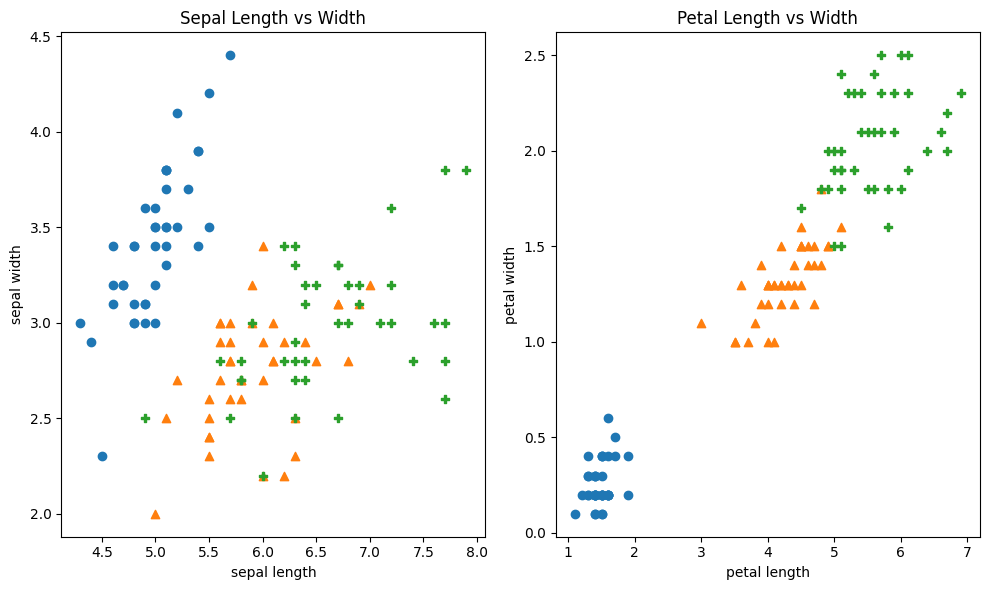

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1,2,1) #1행 2열에서 첫번째 서브그래프를 정의
#3개 클래스의 꽃받침 산포도: sepal's length(x), sepal's width(y)
plt.scatter(train_input_c0[:,0],train_input_c0[:,1])
plt.scatter(train_input_c1[:,0],train_input_c1[:,1],marker='^')
plt.scatter(train_input_c2[:,0],train_input_c2[:,1],marker='P')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal Length vs Width')

plt.subplot(1,2,2) #1행 2열에서 두번째 서브그래프를 정의
#3개 클래스의 꽃잎 산포도: petal's length(x), petal's weight(y)
plt.scatter(train_input_c0[:,2],train_input_c0[:,3])
plt.scatter(train_input_c1[:,2],train_input_c1[:,3],marker='^')
plt.scatter(train_input_c2[:,2],train_input_c2[:,3],marker='P')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal Length vs Width')
plt.tight_layout()#서브 그래프가 겹치지 않게 자동으로 간격 조절
plt.show()